In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
download.file("https://media.githubusercontent.com/media/danchyy/Basketball_Analytics/master/Data/nba_players_stats/Seasons_Stats.csv", "data/basketball.csv")



In [3]:
colnames<- c("index", "Year","Player","Pos","Age","Tm","G","GS","MP","PER","TS",
             "PAr","FTr","ORB","DRB","TRB","AST","STL","BLK",
             "TOV","USG","blanl","OWS","DWS","WS","WS_over_48",
             "blank2","OBPM","DBPM","BPM","VORP","FG","FGA",
             "FG","Three_P","three_PA","three_P_percent","two_P","two_PA","two_P_percent",
             "eFG_percent","FT","FTA","FT_percent","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS")
basketball<-read_csv("data/basketball.csv", col_names=colnames, skip=1)
basketball

New names:
• `ORB` -> `ORB...14`
• `DRB` -> `DRB...15`
• `TRB` -> `TRB...16`
• `AST` -> `AST...17`
• `STL` -> `STL...18`
• `BLK` -> `BLK...19`
• `TOV` -> `TOV...20`
• `FG` -> `FG...32`
• `FG` -> `FG...34`
• `ORB` -> `ORB...45`
• `DRB` -> `DRB...46`
• `TRB` -> `TRB...47`
• `AST` -> `AST...48`
• `STL` -> `STL...49`
• `BLK` -> `BLK...50`
• `TOV` -> `TOV...51`
Rows: 24691 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Pos, Tm
dbl (48): index, Year, Age, G, GS, MP, PER, TS, PAr, FTr, ORB...14, DRB...15...
lgl  (2): blanl, blank2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,⋯,FT_percent,ORB...45,DRB...46,TRB...47,AST...48,STL...49,BLK...50,TOV...51,PF,PTS
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1950,Curly Armstrong,G-F,31,FTW,63,NA,NA,NA,⋯,0.705,NA,NA,NA,176,NA,NA,NA,217,458
1,1950,Cliff Barker,SG,29,INO,49,NA,NA,NA,⋯,0.708,NA,NA,NA,109,NA,NA,NA,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,NA,NA,NA,⋯,0.698,NA,NA,NA,140,NA,NA,NA,192,438
3,1950,Ed Bartels,F,24,TOT,15,NA,NA,NA,⋯,0.559,NA,NA,NA,20,NA,NA,NA,29,63
4,1950,Ed Bartels,F,24,DNN,13,NA,NA,NA,⋯,0.548,NA,NA,NA,20,NA,NA,NA,27,59
5,1950,Ed Bartels,F,24,NYK,2,NA,NA,NA,⋯,0.667,NA,NA,NA,0,NA,NA,NA,2,4
6,1950,Ralph Beard,G,22,INO,60,NA,NA,NA,⋯,0.762,NA,NA,NA,233,NA,NA,NA,132,895
7,1950,Gene Berce,G-F,23,TRI,3,NA,NA,NA,⋯,0.000,NA,NA,NA,2,NA,NA,NA,6,10
8,1950,Charlie Black,F-C,28,TOT,65,NA,NA,NA,⋯,0.651,NA,NA,NA,163,NA,NA,NA,273,661


In [24]:


wrangle_basketball <- basketball|>
    select(Year, Player, eFG_percent, G, PTS, MP)|>
    filter(Year>=2000) |>
    group_by(Player) |>
    summarize(eFG_percent = mean(eFG_percent, na.rm = TRUE),
              G = sum(G, na.rm = TRUE),
              PTS = sum(PTS, na.rm = TRUE),
             MP = sum(MP, na.rm = TRUE)) |>
    mutate(PPG = PTS/G)|>
    mutate(MPG = MP/G)
wrangle_basketball

Player,eFG_percent,G,PTS,MP,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,0.4460000,164,780,3340,4.7560976,20.365854
A.J. Bramlett,0.1900000,8,8,61,1.0000000,7.625000
A.J. Guyton,0.3106667,80,442,1246,5.5250000,15.575000
A.J. Hammons,0.4640000,22,48,163,2.1818182,7.409091
A.J. Price,0.4121111,287,1656,4253,5.7700348,14.818815
Aaron Brooks,0.4776667,797,7839,17088,9.8356336,21.440402
Aaron Gordon,0.4953333,205,1981,4958,9.6634146,24.185366
Aaron Gray,0.5087273,387,1235,4517,3.1912145,11.671835
Aaron Harrison,0.1710000,26,19,110,0.7307692,4.230769


In [5]:
mean_basketball <- wrangle_basketball |>
    select(eFG_percent, G, PTS, PPG)|>
    map_df(mean, na.rm=TRUE)
mean_basketball

eFG_percent,G,PTS,PPG
<dbl>,<dbl>,<dbl>,<dbl>
0.4469252,290.5716,2746.937,6.29437


In [6]:
max_basketball <- wrangle_basketball |>
    select(eFG_percent, G, PTS, PPG)|>
    map_df(max, na.rm=TRUE)
max_basketball

eFG_percent,G,PTS,PPG
<dbl>,<dbl>,<dbl>,<dbl>
1,1562,30888,27.19915


In [8]:
min_basketball <- wrangle_basketball |>
    select(eFG_percent, G, PTS, PPG)|>
    map_df(min, na.rm=TRUE)
min_basketball

eFG_percent,G,PTS,PPG
<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0


In [9]:
sd_basketball <- wrangle_basketball |>
    select(eFG_percent, G, PTS, PPG)|>
    map_df(sd, na.rm=TRUE)
sd_basketball

eFG_percent,G,PTS,PPG
<dbl>,<dbl>,<dbl>,<dbl>
0.1029322,300.1633,4155.652,4.621408


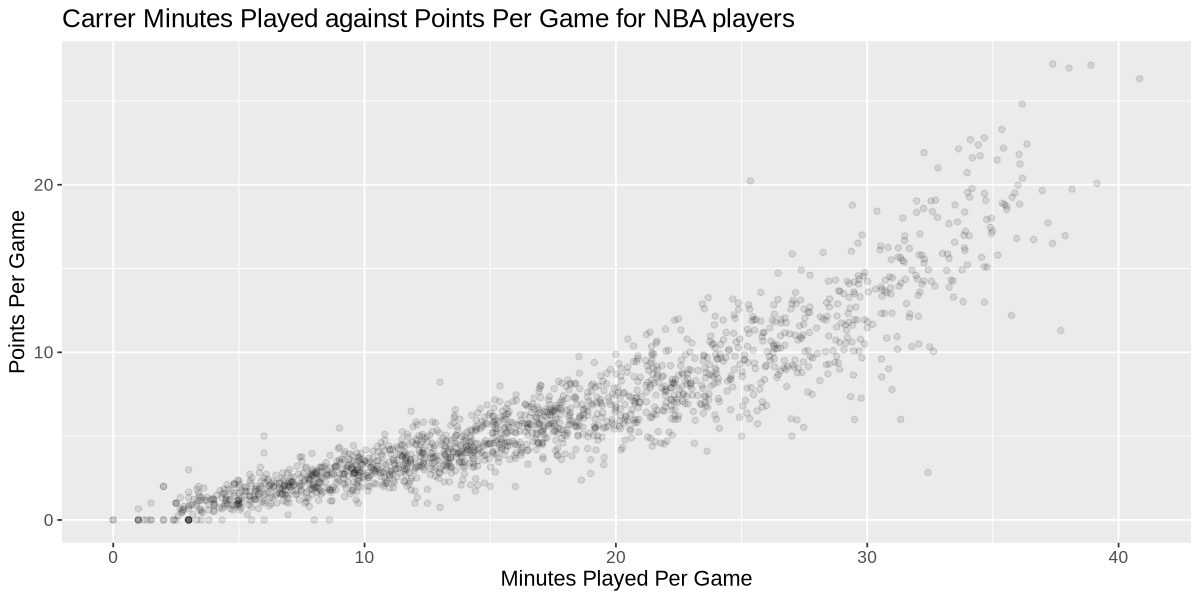

In [25]:
options(repr.plot.width=10, repr.plot.height=5)
efg_point_plot <- ggplot(wrangle_basketball, aes(x = MPG, y=PPG))+
    geom_point(alpha=0.1)+
   
    labs(x="Minutes Played Per Game",
        y="Points Per Game")+
    ggtitle("Minutes Played Per Game against Points Per Game for NBA players")+
    theme(text=element_text(size=13))

efg_point_plot